# 第4章 : DataFrameの構造を理解する

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
np.random.seed(17) # 乱数シード固定
arr_int1 = np.random.randint(100, 10000, 100)
arr_int1[:5] # 上5個だけ表示

array([2291,  506, 9629, 6161, 8570], dtype=int32)

In [5]:
# Seriesを作成
sr = pd.Series(arr_int1)
sr # 左側にindexが表示される

0     2291
1      506
2     9629
3     6161
4     8570
      ... 
95    4285
96    9714
97    5113
98    5916
99    1578
Length: 100, dtype: int32

seriesとndarrayを比較する

In [6]:
type(sr)

pandas.core.series.Series

In [7]:
sr.ndim # ndarrayと同じくndimある

1

In [8]:
sr.shape # ndarrayと同じくshapeある

(100,)

In [9]:
sr.max() # ndarrayと同じくmax()ある

np.int32(9991)

In [10]:
sr.reshape() # ndarrayと異なりreshape()はない

AttributeError: 'Series' object has no attribute 'reshape'

In [11]:
# Seriesに名前を付ける
sr.name = "Price"
sr

0     2291
1      506
2     9629
3     6161
4     8570
      ... 
95    4285
96    9714
97    5113
98    5916
99    1578
Name: Price, Length: 100, dtype: int32

In [12]:
# Series作成時に名前を付けることもできる
sr_price = pd.Series(arr_int1, name="Price")
sr_price

0     2291
1      506
2     9629
3     6161
4     8570
      ... 
95    4285
96    9714
97    5113
98    5916
99    1578
Name: Price, Length: 100, dtype: int32

次にDataFrameを作成していく

In [13]:
np.random.seed(17)
arr_int2 = np.random.randint(10, 100, 100)
sr_quantity = pd.Series(arr_int2, name="Quantity")

In [17]:
np.random.seed(17)
arr_f1 = np.random.rand(100, 2) * 10 # 100行2列の0~10の値をとる少数データ作成
sr = pd.Series(arr_f1) # error

ValueError: Data must be 1-dimensional, got ndarray of shape (100, 2) instead

これより、Seriesでは1次元配列でないと作成できない

2次元の配列の場合はDataFrameを使う

In [18]:
df = pd.DataFrame(arr_f1)
df

,0,1
0,2.946650,5.305868
1,1.915208,0.679004
2,7.869855,6.563335
3,6.375209,5.756029
4,0.390629,3.578136
...,...,...
95,9.133029,5.902204
96,1.711943,7.144745
97,2.384461,9.218051
98,7.212739,6.769230


In [19]:
# カラム名を変更
df_wh = pd.DataFrame(arr_f1, columns=["Width", "Height"])
df_wh

,Width,Height
0,2.946650,5.305868
1,1.915208,0.679004
2,7.869855,6.563335
3,6.375209,5.756029
4,0.390629,3.578136
...,...,...
95,9.133029,5.902204
96,1.711943,7.144745
97,2.384461,9.218051
98,7.212739,6.769230


In [20]:
# 40~60の一様分布の小数データ(100, 1)からDataFrameを作成
np.random.seed(17)
arr_uni = np.random.uniform(40, 60, (100, 1))
df_quality = pd.DataFrame(arr_uni, columns=["Quality"])
df_quality

,Quality
0,45.893300
1,50.611735
2,43.830416
3,41.358007
4,55.739709
...,...
95,41.603027
96,57.420940
97,54.261728
98,54.642241


In [21]:
# 平均0, 標準偏差1の正規分布に従う小数データ(100,1)からDataFrameを作成
np.random.seed(17)
arr_n = np.random.randn(100, 1)
df_difference = pd.DataFrame(arr_n, columns=["Difference"])

In [22]:
# 平均50, 標準偏差10の正規分布に従う小数データ(100, 1)からDataFrameを作成
np.random.seed(17)
arr_nor = np.random.normal(50, 10, (100, 1))
df_score = pd.DataFrame(arr_nor, columns=["Score"])

In [23]:
# ndarrayの結合
np.random.seed(17)
colors = ["red", "green", "blue"]
shapes = ["circle", "square", "triangle"]
arr_colors = np.random.choice(colors, (100, 1))
arr_shapes = np.random.choice(shapes, (100, 1))

arr_cs = np.concatenate([arr_colors, arr_shapes]) # (200, 1)
arr_cs

array([['green'],
       ['blue'],
       ['blue'],
       ['green'],
       ['red'],
       ['green'],
       ['blue'],
       ['red'],
       ['red'],
       ['red'],
       ['green'],
       ['blue'],
       ['green'],
       ['green'],
       ['red'],
       ['blue'],
       ['blue'],
       ['blue'],
       ['blue'],
       ['green'],
       ['green'],
       ['blue'],
       ['green'],
       ['blue'],
       ['green'],
       ['green'],
       ['green'],
       ['red'],
       ['green'],
       ['green'],
       ['blue'],
       ['blue'],
       ['blue'],
       ['red'],
       ['blue'],
       ['green'],
       ['green'],
       ['red'],
       ['blue'],
       ['blue'],
       ['green'],
       ['red'],
       ['green'],
       ['red'],
       ['blue'],
       ['blue'],
       ['red'],
       ['green'],
       ['blue'],
       ['blue'],
       ['blue'],
       ['green'],
       ['red'],
       ['green'],
       ['red'],
       ['red'],
       ['red'],
       ['red'],
       ['

In [26]:
arr_cs = np.concatenate([arr_colors, arr_shapes], axis=1) # (100, 2)になる
arr_cs[:5] # 5行だけ表示

array([['green', 'triangle'],
       ['blue', 'triangle'],
       ['blue', 'square'],
       ['green', 'square'],
       ['red', 'square']], dtype='<U8')

In [27]:
# hstack(Horizontal)
arr_cs_hstack = np.hstack([arr_colors, arr_shapes])
arr_cs_hstack[:5]

array([['green', 'triangle'],
       ['blue', 'triangle'],
       ['blue', 'square'],
       ['green', 'square'],
       ['red', 'square']], dtype='<U8')

In [29]:
# vstack(Vertical)
arr_cs_vstack = np.vstack([arr_colors, arr_shapes])
arr_cs_vstack[98:103]

array([['blue'],
       ['red'],
       ['triangle'],
       ['triangle'],
       ['square']], dtype='<U8')

In [30]:
# DataFrameを作成
df_cs = pd.DataFrame(arr_cs, columns=["Color", "Shape"])

DateTimeを使用する

`freq`について以下がある
- `D` : 日
- `B` : 月曜-金曜
- `W` : 週(日曜スタート)
- `M` : 月末
- `Y` : 年末

さらに、`2D`, `12H`などとして使用できる

In [33]:
dates = pd.date_range("1997/7/5", periods=100, freq="D") # DatetimeIndex型で1997/7/5を始点として1日間隔で100個作成
dates

DatetimeIndex(['1997-07-05', '1997-07-06', '1997-07-07', '1997-07-08',
               '1997-07-09', '1997-07-10', '1997-07-11', '1997-07-12',
               '1997-07-13', '1997-07-14', '1997-07-15', '1997-07-16',
               '1997-07-17', '1997-07-18', '1997-07-19', '1997-07-20',
               '1997-07-21', '1997-07-22', '1997-07-23', '1997-07-24',
               '1997-07-25', '1997-07-26', '1997-07-27', '1997-07-28',
               '1997-07-29', '1997-07-30', '1997-07-31', '1997-08-01',
               '1997-08-02', '1997-08-03', '1997-08-04', '1997-08-05',
               '1997-08-06', '1997-08-07', '1997-08-08', '1997-08-09',
               '1997-08-10', '1997-08-11', '1997-08-12', '1997-08-13',
               '1997-08-14', '1997-08-15', '1997-08-16', '1997-08-17',
               '1997-08-18', '1997-08-19', '1997-08-20', '1997-08-21',
               '1997-08-22', '1997-08-23', '1997-08-24', '1997-08-25',
               '1997-08-26', '1997-08-27', '1997-08-28', '1997-08-29',
      

In [34]:
# DatetimeIndexをSeriesに変換
sr_date = pd.Series(dates, name="Date")
type(sr_date)

pandas.core.series.Series

In [35]:
# Dfを結合する
# ndarrayではcondatenateだが、DataFrameではconcat
df = pd.concat([sr_date, sr_price, sr_quantity, df_wh, df_quality, df_score, df_difference, df_cs], axis=1)
df

,Date,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
0,1997-07-05,2291,25,2.946650,5.305868,45.893300,52.762659,0.276266,green,triangle
1,1997-07-06,506,16,1.915208,0.679004,50.611735,31.453719,-1.854628,blue,triangle
2,1997-07-07,9629,32,7.869855,6.563335,43.830416,56.239011,0.623901,blue,square
3,1997-07-08,6161,67,6.375209,5.756029,41.358007,61.453113,1.145311,green,square
4,1997-07-09,8570,55,0.390629,3.578136,55.739709,60.371905,1.037190,red,square
...,...,...,...,...,...,...,...,...,...,...
95,1997-10-08,4285,50,9.133029,5.902204,41.603027,61.307264,1.130726,blue,circle
96,1997-10-09,9714,76,1.711943,7.144745,57.420940,55.600397,0.560040,red,triangle
97,1997-10-10,5113,62,2.384461,9.218051,54.261728,43.816027,-0.618397,blue,square
98,1997-10-11,5916,57,7.212739,6.769230,54.642241,47.752013,-0.224799,blue,circle


In [36]:
# DataFrameのサンプル方法
df.head() # 5行表示

,Date,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
0,1997-07-05,2291,25,2.946650,5.305868,45.893300,52.762659,0.276266,green,triangle
1,1997-07-06,506,16,1.915208,0.679004,50.611735,31.453719,-1.854628,blue,triangle
2,1997-07-07,9629,32,7.869855,6.563335,43.830416,56.239011,0.623901,blue,square
3,1997-07-08,6161,67,6.375209,5.756029,41.358007,61.453113,1.145311,green,square
4,1997-07-09,8570,55,0.390629,3.578136,55.739709,60.371905,1.037190,red,square


In [37]:
df.head(3) # 先頭3行

,Date,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
0,1997-07-05,2291,25,2.946650,5.305868,45.893300,52.762659,0.276266,green,triangle
1,1997-07-06,506,16,1.915208,0.679004,50.611735,31.453719,-1.854628,blue,triangle
2,1997-07-07,9629,32,7.869855,6.563335,43.830416,56.239011,0.623901,blue,square


In [38]:
df.tail(3) # 末尾3行

,Date,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
97,1997-10-10,5113,62,2.384461,9.218051,54.261728,43.816027,-0.618397,blue,square
98,1997-10-11,5916,57,7.212739,6.769230,54.642241,47.752013,-0.224799,blue,circle
99,1997-10-12,1578,77,9.868106,5.397452,56.472400,72.159015,2.215901,red,circle


In [39]:
df.sample(3) # ランダム

,Date,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
13,1997-07-18,5863,27,1.509067,0.552414,57.545811,48.619507,-0.138049,green,triangle
92,1997-10-05,8057,60,5.927891,0.157152,59.760133,78.711269,2.871127,blue,square
18,1997-07-23,1933,73,6.767624,1.184723,49.670572,39.077701,-1.092230,blue,triangle


In [40]:
df.sample(frac=1) # シャッフル

,Date,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
20,1997-07-25,3445,48,7.972677,0.679787,45.954514,40.177057,-0.982294,green,square
6,1997-07-11,3723,41,8.640421,8.772905,52.750418,48.883017,-0.111698,blue,circle
69,1997-09-12,5535,35,1.572095,4.252405,58.322202,56.110079,0.611008,red,triangle
35,1997-08-09,8119,37,2.738132,2.363811,43.179175,58.696238,0.869624,green,circle
95,1997-10-08,4285,50,9.133029,5.902204,41.603027,61.307264,1.130726,blue,circle
...,...,...,...,...,...,...,...,...,...,...
42,1997-08-16,6307,37,4.537375,4.876773,59.215755,51.267272,0.126727,green,square
92,1997-10-05,8057,60,5.927891,0.157152,59.760133,78.711269,2.871127,blue,square
31,1997-08-05,7921,54,1.974438,0.833254,56.627278,48.614148,-0.138585,blue,circle
10,1997-07-15,5916,54,2.977257,5.615089,58.913664,71.712570,2.171257,green,triangle


In [41]:
df.sample(frac=1, random_state=17) # randome_stateでシード値を指定できる

,Date,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
71,1997-09-14,6801,99,3.606084,1.688734,44.727623,49.963040,-0.003696,blue,square
28,1997-08-02,3216,15,1.304293,9.843835,54.360744,42.447770,-0.755223,green,circle
9,1997-07-14,1874,94,4.835286,2.829882,47.156272,45.622168,-0.437783,red,circle
4,1997-07-09,8570,55,0.390629,3.578136,55.739709,60.371905,1.037190,red,square
73,1997-09-16,6354,84,7.945283,7.917093,54.312865,56.844951,0.684495,green,triangle
...,...,...,...,...,...,...,...,...,...,...
45,1997-08-19,7708,36,5.156806,5.698250,54.871535,50.991466,0.099147,blue,triangle
57,1997-08-31,639,30,9.479230,1.300150,59.687671,61.854042,1.185404,red,triangle
22,1997-07-27,8521,67,7.187761,7.435768,47.920949,54.913338,0.491334,green,square
6,1997-07-11,3723,41,8.640421,8.772905,52.750418,48.883017,-0.111698,blue,circle


In [44]:
# pandasの表示設定を変更
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
df

,Date,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
0,1997-07-05,2291,25,2.946650,5.305868,45.893300,52.762659,0.276266,green,triangle
1,1997-07-06,506,16,1.915208,0.679004,50.611735,31.453719,-1.854628,blue,triangle
2,1997-07-07,9629,32,7.869855,6.563335,43.830416,56.239011,0.623901,blue,square
3,1997-07-08,6161,67,6.375209,5.756029,41.358007,61.453113,1.145311,green,square
4,1997-07-09,8570,55,0.390629,3.578136,55.739709,60.371905,1.037190,red,square
5,1997-07-10,9347,32,9.456832,0.600447,53.126670,68.866389,1.886639,green,triangle
6,1997-07-11,3723,41,8.640421,8.772905,52.750418,48.883017,-0.111698,blue,circle
7,1997-07-12,4664,78,0.511937,6.524186,51.512058,46.378987,-0.362101,red,square
8,1997-07-13,3045,49,5.517514,5.975133,40.781258,51.486750,0.148675,red,triangle
9,1997-07-14,1874,94,4.835286,2.829882,47.156272,45.622168,-0.437783,red,circle


In [46]:
# もどす
pd.set_option("display.max_rows", 20)

続いて、SeriesとDataFrameの関係性についてみていく

In [47]:
sr_price.head()

0    2291
1     506
2    9629
3    6161
4    8570
Name: Price, dtype: int32

In [48]:
df["Price"].head()

0    2291
1     506
2    9629
3    6161
4    8570
Name: Price, dtype: int32

In [49]:
type(df["Price"].head())

pandas.core.series.Series

このようにDataFrameのある1列を取り出すとSeries型になる

In [50]:
# Seriesをndarrayに変換
df["Price"].values

array([2291,  506, 9629, 6161, 8570, 9347, 3723, 4664, 3045, 1874, 5916,
       2926, 4678, 5863, 8099, 7530, 7434, 8255, 1933, 4893, 3445, 5202,
       8521, 4629, 2180, 2977,  266, 5222, 3216, 7194, 7645, 7921, 2716,
       4479, 2894, 8119, 9110, 4768, 3180,  535, 2431, 4063, 6307, 1150,
       3263, 7708,  722, 1838, 4710, 1429, 3349, 9900, 1584,  888, 4467,
       7304, 3649,  639, 3863, 7409, 3193, 1648, 9085,  975, 3773, 7399,
       5294, 4513, 1991, 5535, 5523, 6801, 5985, 6354, 1554, 4239, 5511,
       4002, 7804, 2343, 4086, 9187, 4236, 2854, 1864, 6035, 7975, 8538,
       1702,  860, 2078, 2427, 8057, 7691, 9991, 4285, 9714, 5113, 5916,
       1578], dtype=int32)

In [51]:
# DataFrameをndarrayに変換
df.values[:2]

array([[Timestamp('1997-07-05 00:00:00'), 2291, 25, 2.9466500268710973,
        5.305867556052942, 45.893300053742195, 52.76265890021319,
        0.27626589002131874, 'green', 'triangle'],
       [Timestamp('1997-07-06 00:00:00'), 506, 16, 1.9152078694749486,
        0.6790035819129137, 50.61173511210588, 31.45371921193495,
        -1.854628078806505, 'blue', 'triangle']], dtype=object)

In [52]:
# Seriesをlistに変換
df["Price"].tolist()[:5]

[2291, 506, 9629, 6161, 8570]

In [53]:
# DataFrameをlistに変換
df.values.tolist()[:3]

[[Timestamp('1997-07-05 00:00:00'),
  2291,
  25,
  2.9466500268710973,
  5.305867556052942,
  45.893300053742195,
  52.76265890021319,
  0.27626589002131874,
  'green',
  'triangle'],
 [Timestamp('1997-07-06 00:00:00'),
  506,
  16,
  1.9152078694749486,
  0.6790035819129137,
  50.61173511210588,
  31.45371921193495,
  -1.854628078806505,
  'blue',
  'triangle'],
 [Timestamp('1997-07-07 00:00:00'),
  9629,
  32,
  7.869854599999133,
  6.563335217758555,
  43.830415738949895,
  56.239011113263565,
  0.6239011113263563,
  'blue',
  'square']]

In [54]:
# Seriesをdictionaryに変換
df["Price"].to_dict() # keyがindexになる

{0: 2291,
 1: 506,
 2: 9629,
 3: 6161,
 4: 8570,
 5: 9347,
 6: 3723,
 7: 4664,
 8: 3045,
 9: 1874,
 10: 5916,
 11: 2926,
 12: 4678,
 13: 5863,
 14: 8099,
 15: 7530,
 16: 7434,
 17: 8255,
 18: 1933,
 19: 4893,
 20: 3445,
 21: 5202,
 22: 8521,
 23: 4629,
 24: 2180,
 25: 2977,
 26: 266,
 27: 5222,
 28: 3216,
 29: 7194,
 30: 7645,
 31: 7921,
 32: 2716,
 33: 4479,
 34: 2894,
 35: 8119,
 36: 9110,
 37: 4768,
 38: 3180,
 39: 535,
 40: 2431,
 41: 4063,
 42: 6307,
 43: 1150,
 44: 3263,
 45: 7708,
 46: 722,
 47: 1838,
 48: 4710,
 49: 1429,
 50: 3349,
 51: 9900,
 52: 1584,
 53: 888,
 54: 4467,
 55: 7304,
 56: 3649,
 57: 639,
 58: 3863,
 59: 7409,
 60: 3193,
 61: 1648,
 62: 9085,
 63: 975,
 64: 3773,
 65: 7399,
 66: 5294,
 67: 4513,
 68: 1991,
 69: 5535,
 70: 5523,
 71: 6801,
 72: 5985,
 73: 6354,
 74: 1554,
 75: 4239,
 76: 5511,
 77: 4002,
 78: 7804,
 79: 2343,
 80: 4086,
 81: 9187,
 82: 4236,
 83: 2854,
 84: 1864,
 85: 6035,
 86: 7975,
 87: 8538,
 88: 1702,
 89: 860,
 90: 2078,
 91: 2427,
 92: 8

In [55]:
# DataFrameをdictionaryに変換
df.to_dict()

{'Date': {0: Timestamp('1997-07-05 00:00:00'),
  1: Timestamp('1997-07-06 00:00:00'),
  2: Timestamp('1997-07-07 00:00:00'),
  3: Timestamp('1997-07-08 00:00:00'),
  4: Timestamp('1997-07-09 00:00:00'),
  5: Timestamp('1997-07-10 00:00:00'),
  6: Timestamp('1997-07-11 00:00:00'),
  7: Timestamp('1997-07-12 00:00:00'),
  8: Timestamp('1997-07-13 00:00:00'),
  9: Timestamp('1997-07-14 00:00:00'),
  10: Timestamp('1997-07-15 00:00:00'),
  11: Timestamp('1997-07-16 00:00:00'),
  12: Timestamp('1997-07-17 00:00:00'),
  13: Timestamp('1997-07-18 00:00:00'),
  14: Timestamp('1997-07-19 00:00:00'),
  15: Timestamp('1997-07-20 00:00:00'),
  16: Timestamp('1997-07-21 00:00:00'),
  17: Timestamp('1997-07-22 00:00:00'),
  18: Timestamp('1997-07-23 00:00:00'),
  19: Timestamp('1997-07-24 00:00:00'),
  20: Timestamp('1997-07-25 00:00:00'),
  21: Timestamp('1997-07-26 00:00:00'),
  22: Timestamp('1997-07-27 00:00:00'),
  23: Timestamp('1997-07-28 00:00:00'),
  24: Timestamp('1997-07-29 00:00:00'),
  

In [56]:
# サンプルごとのデータを取り出す場合
df.to_dict(orient="records")

[{'Date': Timestamp('1997-07-05 00:00:00'),
  'Price': 2291,
  'Quantity': 25,
  'Width': 2.9466500268710973,
  'Height': 5.305867556052942,
  'Quality': 45.893300053742195,
  'Score': 52.76265890021319,
  'Difference': 0.27626589002131874,
  'Color': 'green',
  'Shape': 'triangle'},
 {'Date': Timestamp('1997-07-06 00:00:00'),
  'Price': 506,
  'Quantity': 16,
  'Width': 1.9152078694749486,
  'Height': 0.6790035819129137,
  'Quality': 50.61173511210588,
  'Score': 31.45371921193495,
  'Difference': -1.854628078806505,
  'Color': 'blue',
  'Shape': 'triangle'},
 {'Date': Timestamp('1997-07-07 00:00:00'),
  'Price': 9629,
  'Quantity': 32,
  'Width': 7.869854599999133,
  'Height': 6.563335217758555,
  'Quality': 43.830415738949895,
  'Score': 56.239011113263565,
  'Difference': 0.6239011113263563,
  'Color': 'blue',
  'Shape': 'square'},
 {'Date': Timestamp('1997-07-08 00:00:00'),
  'Price': 6161,
  'Quantity': 67,
  'Width': 6.375208960436359,
  'Height': 5.75602893753034,
  'Quality': 

In [57]:
# indexを指定したSeriesの作成
arr = np.random.randint(0, 100, 8)
pd.Series(arr, name="sample", index=list("ABCDEFGH"))

A    25
B    31
C    87
D    82
E     5
F     5
G    16
H    30
Name: sample, dtype: int32

In [59]:
# DictionaryからSeriesを作成
pd.Series({"A":1, "B":2, "C":3}, name="sample")

A    1
B    2
C    3
Name: sample, dtype: int64

In [62]:
# DictionaryのlistからDataFrameを作成
pd.DataFrame([{"A":1, "B":2, "C":3}, {"A":10, "C":30, "B":20}]) # 1つのdictが1つのレコードとして認識される

,A,B,C
0,1,2,3
1,10,20,30


In [63]:
# インデックスに名前を付ける
pd.DataFrame([{"A":1, "B":2, "C":3}, {"A":10, "C":30, "B":20}], index=["x", "y"])

,A,B,C
x,1,2,3
y,10,20,30


In [64]:
# 2次元listからDataFrameを作成
arr1 = np.random.rand(10)
arr2 = np.random.randn(10)
pd.DataFrame([arr1, arr2])

,0,1,2,3,4,5,6,7,8,9
0,0.671938,0.950605,0.327944,0.641632,0.256059,0.514142,0.502651,0.073043,0.648260,0.970659
1,0.753655,0.722396,2.143382,1.515023,0.782370,0.829342,-2.833786,-0.570191,1.722725,-2.281936


ここからDataFrameの便利なプロパティとメソッド

In [65]:
len(df) # 行数

100

In [66]:
df.info() # カラム情報, 行数など

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        100 non-null    datetime64[ns]
 1   Price       100 non-null    int32         
 2   Quantity    100 non-null    int32         
 3   Width       100 non-null    float64       
 4   Height      100 non-null    float64       
 5   Quality     100 non-null    float64       
 6   Score       100 non-null    float64       
 7   Difference  100 non-null    float64       
 8   Color       100 non-null    object        
 9   Shape       100 non-null    object        
dtypes: datetime64[ns](1), float64(5), int32(2), object(2)
memory usage: 7.2+ KB


In [68]:
df.size # 要素数

1000

In [69]:
df.shape # 形状

(100, 10)

In [72]:
df.count() # カラムごとの集計

Date          100
Price         100
Quantity      100
Width         100
Height        100
Quality       100
Score         100
Difference    100
Color         100
Shape         100
dtype: int64

In [73]:
df.count(axis=1) # 行ごとの集計

0     10
1     10
2     10
3     10
4     10
      ..
95    10
96    10
97    10
98    10
99    10
Length: 100, dtype: int64

In [74]:
df.count().sum()

np.int64(1000)

In [75]:
df.count().count()

np.int64(10)

In [76]:
type(df.count()) # Series

pandas.core.series.Series

In [79]:
df.sum(numeric_only=True) # カラムごとの和

Price         475938.000000
Quantity        5014.000000
Width            517.582747
Height           512.554742
Quality         5020.788093
Score           5111.509794
Difference        11.150979
dtype: float64

In [80]:
df.select_dtypes(include=['int', 'float']).sum()

Price         475938.000000
Quantity        5014.000000
Width            517.582747
Height           512.554742
Quality         5020.788093
Score           5111.509794
Difference        11.150979
dtype: float64

以下axisの理解

In [81]:
arr = np.arange(12).reshape(3, 4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [82]:
arr.sum(axis=0)

array([12, 15, 18, 21])

In [83]:
arr.sum(axis=1)

array([ 6, 22, 38])

In [84]:
arr.shape

(3, 4)

In [85]:
arr.sum(axis=0)

array([12, 15, 18, 21])

In [86]:
arr.sum(axis=1)

array([ 6, 22, 38])

In [88]:
arr = arr.reshape(2, 3, 2)
arr

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]]])

In [89]:
arr.sum(axis=0)

array([[ 6,  8],
       [10, 12],
       [14, 16]])

In [90]:
arr.sum(axis=1)

array([[ 6,  9],
       [24, 27]])

In [91]:
arr.sum(axis=2)

array([[ 1,  5,  9],
       [13, 17, 21]])

続いて、IndexとColumnについて

In [92]:
df.index

RangeIndex(start=0, stop=100, step=1)

In [93]:
df.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [96]:
pd.RangeIndex(1, 20, 4).values # (start, stop, size)

array([ 1,  5,  9, 13, 17])

In [97]:
df.columns

Index(['Date', 'Price', 'Quantity', 'Width', 'Height', 'Quality', 'Score',
       'Difference', 'Color', 'Shape'],
      dtype='object')

In [98]:
type(df.columns)

pandas.core.indexes.base.Index

In [101]:
df.head(3)

,Date,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
0,1997-07-05,2291,25,2.946650,5.305868,45.893300,52.762659,0.276266,green,triangle
1,1997-07-06,506,16,1.915208,0.679004,50.611735,31.453719,-1.854628,blue,triangle
2,1997-07-07,9629,32,7.869855,6.563335,43.830416,56.239011,0.623901,blue,square


In [107]:
df.set_index("Date", inplace=True)

In [109]:
df.head(3)

,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
Date,,,,,,,,,
1997-07-05,2291,25,2.946650,5.305868,45.893300,52.762659,0.276266,green,triangle
1997-07-06,506,16,1.915208,0.679004,50.611735,31.453719,-1.854628,blue,triangle
1997-07-07,9629,32,7.869855,6.563335,43.830416,56.239011,0.623901,blue,square


In [110]:
# indexリセット
df.reset_index(inplace=True)
df.head()

,Date,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
0,1997-07-05,2291,25,2.946650,5.305868,45.893300,52.762659,0.276266,green,triangle
1,1997-07-06,506,16,1.915208,0.679004,50.611735,31.453719,-1.854628,blue,triangle
2,1997-07-07,9629,32,7.869855,6.563335,43.830416,56.239011,0.623901,blue,square
3,1997-07-08,6161,67,6.375209,5.756029,41.358007,61.453113,1.145311,green,square
4,1997-07-09,8570,55,0.390629,3.578136,55.739709,60.371905,1.037190,red,square


index, columnsラベルの変更

In [111]:
cols = df.columns

In [115]:
df.rename(index={0:"ZERO"}, columns={"Date":"Time"})

,Time,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
ZERO,1997-07-05,2291,25,2.946650,5.305868,45.893300,52.762659,0.276266,green,triangle
1,1997-07-06,506,16,1.915208,0.679004,50.611735,31.453719,-1.854628,blue,triangle
2,1997-07-07,9629,32,7.869855,6.563335,43.830416,56.239011,0.623901,blue,square
3,1997-07-08,6161,67,6.375209,5.756029,41.358007,61.453113,1.145311,green,square
4,1997-07-09,8570,55,0.390629,3.578136,55.739709,60.371905,1.037190,red,square
...,...,...,...,...,...,...,...,...,...,...
95,1997-10-08,4285,50,9.133029,5.902204,41.603027,61.307264,1.130726,blue,circle
96,1997-10-09,9714,76,1.711943,7.144745,57.420940,55.600397,0.560040,red,triangle
97,1997-10-10,5113,62,2.384461,9.218051,54.261728,43.816027,-0.618397,blue,square
98,1997-10-11,5916,57,7.212739,6.769230,54.642241,47.752013,-0.224799,blue,circle


In [117]:
# indexをすべて変更
df.index = np.arange(100, 200) # start, stop
df.head(3)

,Date,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
100,1997-07-05,2291,25,2.946650,5.305868,45.893300,52.762659,0.276266,green,triangle
101,1997-07-06,506,16,1.915208,0.679004,50.611735,31.453719,-1.854628,blue,triangle
102,1997-07-07,9629,32,7.869855,6.563335,43.830416,56.239011,0.623901,blue,square


In [119]:
df.columns = list("ABCDEFGHIJ")
df.head(3)

,A,B,C,D,E,F,G,H,I,J
100,1997-07-05,2291,25,2.946650,5.305868,45.893300,52.762659,0.276266,green,triangle
101,1997-07-06,506,16,1.915208,0.679004,50.611735,31.453719,-1.854628,blue,triangle
102,1997-07-07,9629,32,7.869855,6.563335,43.830416,56.239011,0.623901,blue,square


In [126]:
df = df.add_prefix("#") # カラムにprefixをつける
df.head(3)

,#level_0,#index,##A,##B,##C,##D,##E,##F,##G,##H,##I,##J
0,0,100,1997-07-05,2291,25,2.946650,5.305868,45.893300,52.762659,0.276266,green,triangle
1,1,101,1997-07-06,506,16,1.915208,0.679004,50.611735,31.453719,-1.854628,blue,triangle
2,2,102,1997-07-07,9629,32,7.869855,6.563335,43.830416,56.239011,0.623901,blue,square


In [128]:
# index戻す
df.reset_index(inplace=True, drop=True)
df.head(3)

,#level_0,#index,##A,##B,##C,##D,##E,##F,##G,##H,##I,##J
0,0,100,1997-07-05,2291,25,2.946650,5.305868,45.893300,52.762659,0.276266,green,triangle
1,1,101,1997-07-06,506,16,1.915208,0.679004,50.611735,31.453719,-1.854628,blue,triangle
2,2,102,1997-07-07,9629,32,7.869855,6.563335,43.830416,56.239011,0.623901,blue,square


In [129]:
df = df.drop(["#level_0", "#index"], axis=1) # 列削除
df.head(3)

,##A,##B,##C,##D,##E,##F,##G,##H,##I,##J
0,1997-07-05,2291,25,2.946650,5.305868,45.893300,52.762659,0.276266,green,triangle
1,1997-07-06,506,16,1.915208,0.679004,50.611735,31.453719,-1.854628,blue,triangle
2,1997-07-07,9629,32,7.869855,6.563335,43.830416,56.239011,0.623901,blue,square


In [130]:
# カラム戻す
df.columns = cols
df.head(3)

,Date,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
0,1997-07-05,2291,25,2.946650,5.305868,45.893300,52.762659,0.276266,green,triangle
1,1997-07-06,506,16,1.915208,0.679004,50.611735,31.453719,-1.854628,blue,triangle
2,1997-07-07,9629,32,7.869855,6.563335,43.830416,56.239011,0.623901,blue,square


以下、欠損値について

In [131]:
print(None)

None


In [132]:
print(null)

NameError: name 'null' is not defined

In [133]:
print(np.nan)

nan


In [134]:
null_values = [None, np.nan]

In [136]:
for i in range(30):
    np.random.seed(i)
    s = np.random.randint(0, 100)
    t = np.random.randint(0, 10)
    u = np.random.randint(0, 2)
    df.iloc[s, t] = null_values[u]

In [138]:
df.sample(5)

,Date,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
48,1997-08-22,4710,89,8.710470,7.130864,55.539492,40.839068,-0.916093,blue,triangle
20,1997-07-25,3445,48,7.972677,0.679787,45.954514,40.177057,-0.982294,green,square
4,NaT,8570,55,0.390629,3.578136,55.739709,NaN,1.037190,red,square
44,1997-08-18,3263,73,5.736099,9.603458,NaN,55.576744,0.557674,blue,triangle
43,1997-08-17,1150,97,6.408748,1.061689,53.184108,43.058211,-0.694179,red,triangle


In [139]:
df.isnull()

,Date,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False


In [144]:
df.isnull().sum() # Trueの個数

Date          3
Price         0
Quantity      0
Width         3
Height        3
Quality       4
Score         7
Difference    1
Color         4
Shape         5
dtype: int64

In [145]:
df.isnull().sum().sum()

np.int64(30)

In [147]:
df.info() # これでもnullの個数見れる

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        97 non-null     datetime64[ns]
 1   Price       100 non-null    int32         
 2   Quantity    100 non-null    int32         
 3   Width       97 non-null     float64       
 4   Height      97 non-null     float64       
 5   Quality     96 non-null     float64       
 6   Score       93 non-null     float64       
 7   Difference  99 non-null     float64       
 8   Color       96 non-null     object        
 9   Shape       95 non-null     object        
dtypes: datetime64[ns](1), float64(5), int32(2), object(2)
memory usage: 7.2+ KB


In [149]:
df.isnull().count() # これはTrueもFalseも1とカウントするためこのような結果になる

Date          100
Price         100
Quantity      100
Width         100
Height        100
Quality       100
Score         100
Difference    100
Color         100
Shape         100
dtype: int64

In [151]:
df.isnull().size

1000

In [153]:
df.count() # dfを直接カウントするとnullカウントしない

Date           97
Price         100
Quantity      100
Width          97
Height         97
Quality        96
Score          93
Difference     99
Color          96
Shape          95
dtype: int64

In [154]:
df.isnull().sum(axis=1)

0     0
1     1
2     0
3     0
4     2
     ..
95    0
96    0
97    0
98    0
99    2
Length: 100, dtype: int64

In [155]:
0 < df.isnull().sum(axis=1)

0     False
1      True
2     False
3     False
4      True
      ...  
95    False
96    False
97    False
98    False
99     True
Length: 100, dtype: bool

In [157]:
# df[]のindexに行数と同じサイズのbool配列を渡すとTrueの行だけ取得できる
# そのため以下のように書くことで欠損値のあるレコードだけ取得できる
df[0 < df.isnull().sum(axis=1)]

,Date,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
1,1997-07-06,506,16,1.915208,0.679004,50.611735,31.453719,-1.854628,blue,NaN
4,NaT,8570,55,0.390629,3.578136,55.739709,NaN,1.037190,red,square
9,1997-07-14,1874,94,4.835286,NaN,47.156272,45.622168,-0.437783,red,circle
10,1997-07-15,5916,54,2.977257,5.615089,58.913664,71.712570,2.171257,green,NaN
15,1997-07-20,7530,66,1.987739,8.313639,53.048372,NaN,-1.775282,blue,square
...,...,...,...,...,...,...,...,...,...,...
85,1997-09-28,6035,72,NaN,1.061134,49.753547,48.799655,-0.120035,blue,circle
88,1997-10-01,1702,77,2.610089,5.301368,51.472199,NaN,1.233529,green,circle
92,1997-10-05,8057,60,5.927891,0.157152,NaN,78.711269,2.871127,blue,square
93,1997-10-06,7691,11,5.859937,4.086629,NaN,37.919143,-1.208086,green,circle


In [160]:
# nullをハイライト
df[0 < df.isnull().sum(axis=1)].style.highlight_null(color="#f00")

,Date,Price,Quantity,Width,Height,Quality,Score,Difference,Color,Shape
1,1997-07-06 00:00:00,506,16,1.915208,0.679004,50.611735,31.453719,-1.854628,blue,nan
4,NaT,8570,55,0.390629,3.578136,55.739709,nan,1.037190,red,square
9,1997-07-14 00:00:00,1874,94,4.835286,nan,47.156272,45.622168,-0.437783,red,circle
10,1997-07-15 00:00:00,5916,54,2.977257,5.615089,58.913664,71.712570,2.171257,green,nan
15,1997-07-20 00:00:00,7530,66,1.987739,8.313639,53.048372,nan,-1.775282,blue,square
19,1997-07-24 00:00:00,4893,16,4.449961,8.879824,45.659763,47.499726,-0.250027,None,circle
24,1997-07-29 00:00:00,2180,27,7.769746,8.379915,48.369688,41.936399,-0.806360,green,nan
25,NaT,2977,59,8.293048,0.291570,42.878078,51.312678,0.131268,green,triangle
34,1997-08-08 00:00:00,2894,66,nan,9.161101,50.899971,59.682053,0.968205,blue,square
37,1997-08-11 00:00:00,4768,60,0.827355,6.754864,42.369445,54.652823,0.465282,nan,circle


In [162]:
# 平均値はnullを含めずに計算される
print(df["Score"].mean())
print(df["Score"].sum())
print(df["Score"].sum() / df["Score"].mean())
print(df["Score"].count())

51.022066593933225
4745.05219323579
93.0
93


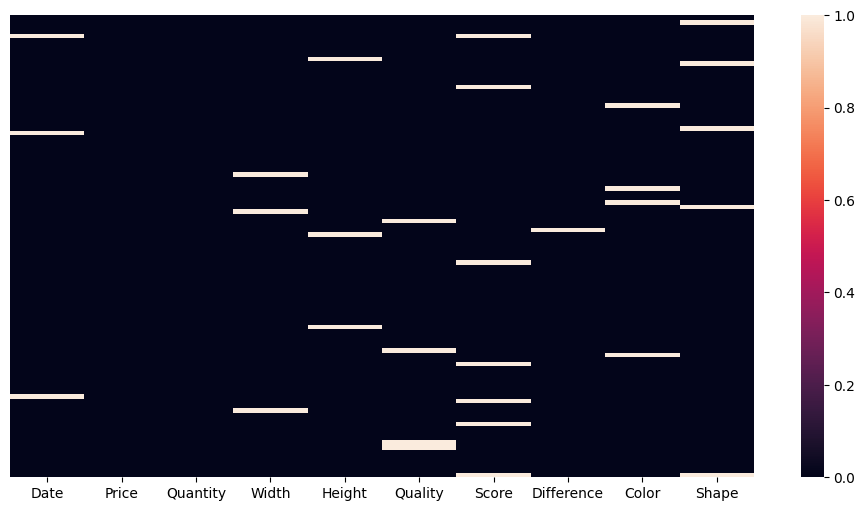

In [164]:
# nullの場所の可視化
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False)
plt.show()

In [165]:
# csvとして保存
df.to_csv("./sample_with_index.csv")

In [167]:
df.to_csv("./sample_without_index.csv", index=False)

In [169]:
df.to_pickle("./sample1.pkl")